In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN


# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Validation
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from collections import Counter
from sklearn.decomposition import PCA

In [1]:
def confusion_matrix_plot(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    print('Confusion matrix:\n', conf_mat)

    labels = ['Class 0', 'Class 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

In [18]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [153]:
def box_dist_plot(dataframe, column):
    plt.subplot(1,2,1)
    dataframe.boxplot(column)
    
    plt.subplot(1,2,2)
    sns.distplot(dataframe[column])
    
    plt.tight_layout()

In [358]:
def coef_importance(X_train, model):
    temp = pd.DataFrame(np.std(X_train, 0), columns=['std'])
    temp['coef'] = model.coef_[0].tolist()
    temp['weight'] = temp['std']*temp['coef']
    temp_sort = temp.sort_values('weight', ascending=False)['weight']
    plt.bar(temp_sort.index, temp_sort)
    plt.xticks(rotation=90)


# dataset

In [124]:
df = pd.read_csv('merge_test1.csv')

In [125]:
# drop extra col
df = df.drop('Unnamed: 0', axis=1)

df.head()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 10th pass,education_Class 12th pass,education_Class 9th or below,...,title_others,source_Referrals,source_WhatsApp OptIn Form,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
0,25.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,4238,149,57,92,4.504703e+05,34.3415
1,20.0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,2746,156,58,98,3.035038e+05,25.9330
2,24.0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,3722,92,33,59,3.426029e+05,16.8930
3,22.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,3617,97,35,62,9.442864e+05,20.0390
4,19.0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,2689,83,30,53,1.033980e+06,11.8200


In [126]:
df.describe()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 10th pass,education_Class 12th pass,education_Class 9th or below,...,title_others,source_Referrals,source_WhatsApp OptIn Form,source_others,time_whole_conversation(hour),total_message_count,incoming_count,outgoing_count,responding,responding_median
count,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,...,10534.00000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,10534.000000,1.053400e+04,10534.000000
mean,29.211885,0.003892,0.030473,0.057148,0.043858,0.190906,0.640782,0.079172,0.113917,0.006740,...,0.59626,0.662996,0.011961,0.286406,352.277767,60.832637,22.136985,38.695652,3.725202e+04,25.148520
std,10.875285,0.062269,0.171892,0.232137,0.204789,0.393034,0.479794,0.270020,0.317725,0.081825,...,0.49067,0.472709,0.108717,0.452103,718.006987,83.476012,32.879492,51.144904,1.371072e+05,685.040020
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000,16.000000,1.321667e+00,0.253000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,49.000000,37.000000,13.000000,24.000000,1.189769e+01,5.474375
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,0.000000,0.000000,184.000000,45.000000,16.000000,29.000000,4.232757e+01,10.955750
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,0.000000,1.000000,242.000000,61.000000,22.000000,39.000000,1.786800e+04,23.165750
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,4944.000000,5319.000000,1872.000000,3447.000000,3.519348e+06,69527.473500


In [245]:
X = df.drop('label', axis=1)
y = df['label']

# Visualization

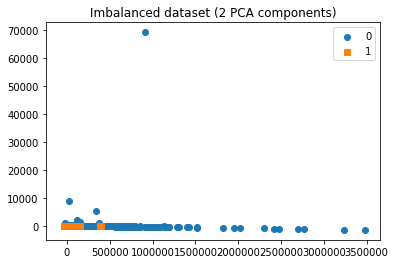

In [136]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

# correlation

In [117]:
cor = df.corr()

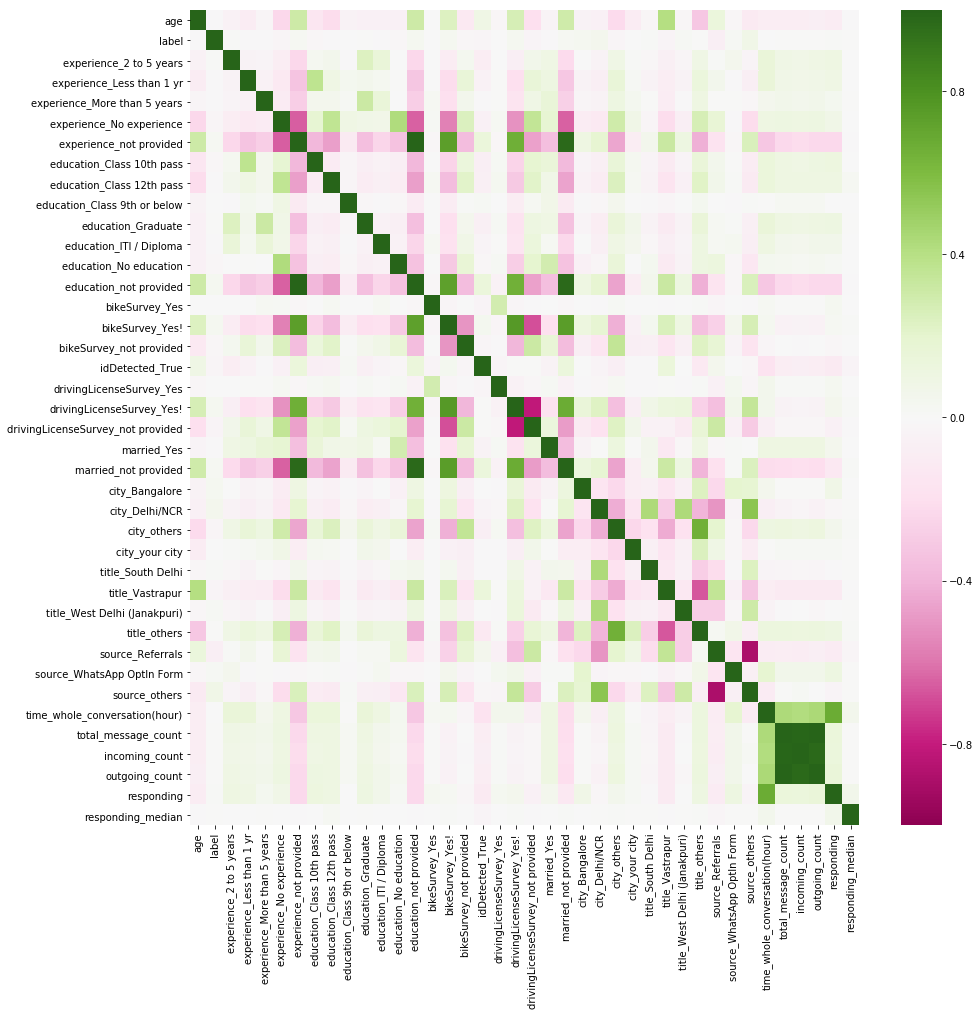

In [118]:
plt.figure(figsize=(15, 15))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, cmap='PiYG', vmax=1, vmin=-1)

# Remove some outliers and columns with high correlation

In [213]:
df_cluster.drop(['total_message_count', 'outgoing_count'], axis=1, inplace=True)

/Users/garykao/Documents/Python_project/venv/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


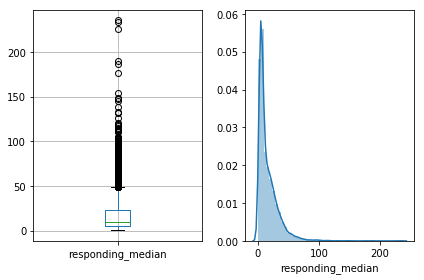

In [207]:
box_dist_plot(df_cluster,'responding_median')

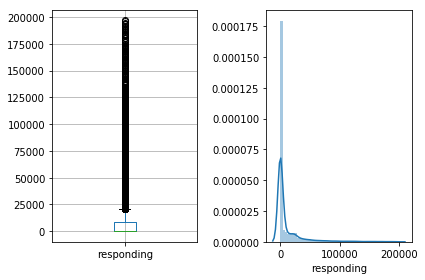

In [208]:
box_dist_plot(df_cluster,'responding')

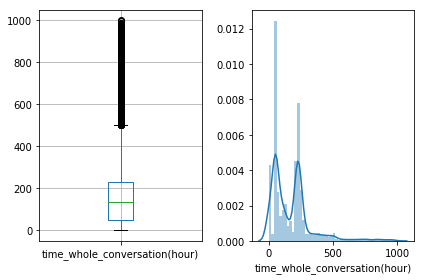

In [209]:
box_dist_plot(df_cluster,'time_whole_conversation(hour)')

In [206]:
# some outliers
df_cluster = df[(df['responding_median']<500) & (df['responding']<200000) & (df['time_whole_conversation(hour)']<1000)]

In [216]:
df_cluster.describe()

,age,label,experience_2 to 5 years,experience_Less than 1 yr,experience_More than 5 years,experience_No experience,experience_not provided,education_Class 10th pass,education_Class 12th pass,education_Class 9th or below,...,title_Vastrapur,title_West Delhi (Janakpuri),title_others,source_Referrals,source_WhatsApp OptIn Form,source_others,time_whole_conversation(hour),incoming_count,responding,responding_median
count,9694.000000,9694.000000,9694.000000,9694.00000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,...,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000,9694.000000
mean,29.579637,0.004023,0.023829,0.04838,0.040231,0.174954,0.685682,0.067774,0.098927,0.006499,...,0.246235,0.052713,0.576130,0.674438,0.006911,0.296988,172.810398,18.759336,10998.281008,16.313630
std,11.109817,0.063304,0.152525,0.21458,0.196511,0.379947,0.464268,0.251370,0.298580,0.080357,...,0.430839,0.223471,0.494196,0.468609,0.082852,0.456955,160.797308,13.328363,26199.945408,16.553573
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.321667,0.253000
25%,23.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,13.000000,10.974034,5.249875
50%,27.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,136.000000,15.000000,32.965692,9.996500
75%,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,230.000000,21.000000,8357.465571,22.631000
max,99.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,998.000000,465.000000,196875.261346,235.292000


### visulaizaiton

In [268]:
X = df_cluster.drop('label', axis=1)
y = df_cluster['label']

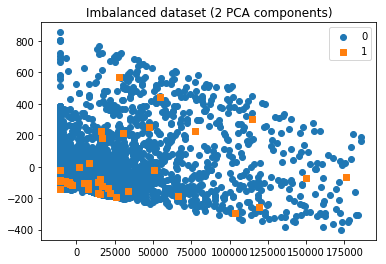

In [249]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

### [under-sampling]  visualization

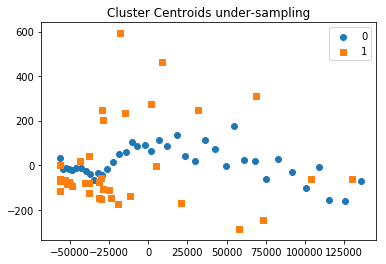

In [259]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='majority')
X_cc, y_cc = cc.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cc)
plot_2d_space(X_pca, y_cc, 'Cluster Centroids under-sampling')

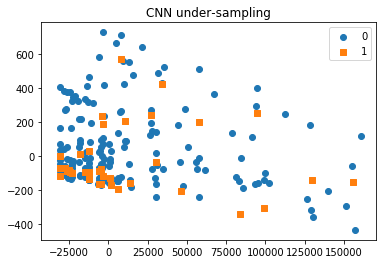

In [452]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy='majority')
X_cnn, y_cnn = cnn.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cnn)
plot_2d_space(X_pca, y_cnn, 'CNN under-sampling')

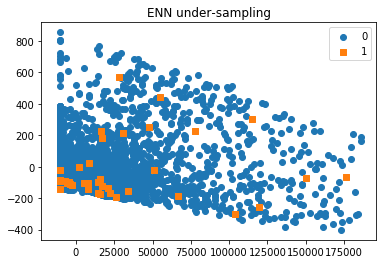

In [453]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_enn, y_enn = enn.fit_resample(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_enn)
plot_2d_space(X_pca, y_enn, 'ENN under-sampling')

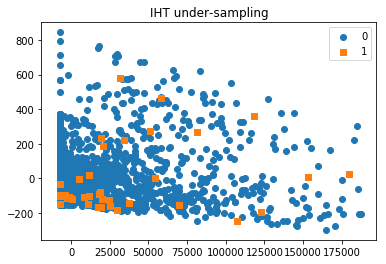

In [457]:
from imblearn.under_sampling import InstanceHardnessThreshold
iht = InstanceHardnessThreshold()
X_iht, y_iht = iht.fit_resample(X,y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iht)
plot_2d_space(X_pca, y_iht, 'IHT under-sampling')